### Time to delivery classifier with different granularity of classes in weeks

In [1]:
import config_classify as cfg
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import psycopg2
import sys
sys.path.insert(1, "C:/sers/jaege/PycharmProjects/labour-katharina");
from labor_katharina import balance, semi_balance_cross_val, labels
import datetime
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix, confusion_matrix
import random
from sklearn.model_selection import LeaveOneOut, KFold, cross_validate, cross_val_predict, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest
from datetime import datetime
import os
import shutil
import json
import pickle
from imblearn.under_sampling import RandomUnderSampler
from uncertainties import ufloat

In [2]:
#load features
features = pd.read_pickle(cfg.features['path'])
features = features.sort_index()
features = features.reset_index()
features = features.drop(columns=['index'])

In [3]:
#use features declared in config file
X = features[cfg.features['names']]
features_meta = features.drop(columns=cfg.features['names'])

#normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [4]:
#create labels
y, features = labels.TTD_create(features, cfg.label['num_classes'])

In [5]:
#set up cross validation
report = []
conf_matrix = np.zeros((cfg.label['num_classes'],cfg.label['num_classes']))
skf = StratifiedKFold(cfg.validation['splits'])
for train_index, test_index in skf.split(X,y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    rus = RandomUnderSampler()
    X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
    
    ####TODO: gridsearch for parameter tuning######
    c = svm.SVC()
    print(c)
    c.fit(X_train_res, y_train_res)
    y_predict = c.predict(X_test)
    
    report.append(classification_report(y_test, y_predict, output_dict=True))
    conf_matrix = np.add(conf_matrix, confusion_matrix(y_test, y_predict, normalize='true'))
    print(confusion_matrix(y_test, y_predict, normalize='true'))
    

train size after resample
21
21
21
test size
4153
4512
3233
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0.60582711 0.05345533 0.14495545 0.0635685  0.02383819 0.03033951
  0.05730797 0.         0.00337106 0.         0.01637371 0.
  0.00096316 0.         0.         0.         0.         0.
  0.        ]
 [0.54055851 0.04809397 0.15137411 0.0837766  0.01684397 0.04100177
  0.08488475 0.         0.00487589 0.         0.02748227 0.
  0.00110816 0.         0.         0.         0.         0.
  0.        ]
 [0.4682957  0.04051964 0.14785029 0.08660687 0.01763068 0.05351067
  0.12248685 0.         0.00835138 0.         0.0482524  0.
  0.00649552 0.         0.         0.         0.         0.
  0.        ]
 [0.36903603 0.02093476 0.18062317 0.07254138 0.01168452 0.05111977
  0.20009737 0.         0.02531646 0.         0.05988315 0.
  0.00876339 0.         0.         0.         0.         0.
  0.        ]
 [0.21752042 0.00668151 0.16109874 0.08092056 0.00965108 0.04157387
  0.31180401 0.         0.06681514 0.         0.07201188 0.
  0.03192279 0.         0.         0.         0.         0.
  0.

D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[2.48976643e-01 1.53864676e-01 2.14302914e-02 4.32217674e-01
  3.39513605e-02 1.44473874e-03 3.58776788e-02 0.00000000e+00
  4.33421623e-03 4.81579581e-04 6.74211413e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94191975e-01 1.49190867e-01 1.92861893e-02 4.45799158e-01
  6.00753713e-02 1.10840168e-03 5.49767236e-02 0.00000000e+00
  1.77344270e-03 1.33008202e-03 7.22677898e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34817563e-01 1.26468769e-01 1.17501546e-02 4.31972789e-01
  1.31106988e-01 0.00000000e+00 6.92640693e-02 0.00000000e+00
  9.27643785e-04 3.09214595e-03 9.05998763e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.10418695e-02 9.63972736e-02 6.32911392e-03 4.02142162e-01
  1.79649464e-01 3.40798442e-03 8.22784810e-02 0.0

D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[5.95616570e-01 6.81599229e-02 3.51637765e-02 2.07129094e-01
  0.00000000e+00 5.34682081e-02 0.00000000e+00 4.81695568e-03
  1.20423892e-03 4.81695568e-04 2.43256262e-02 0.00000000e+00
  2.40847784e-04 2.64932563e-03 2.40847784e-04 6.02119461e-03
  0.00000000e+00 4.81695568e-04 0.00000000e+00]
 [5.27039007e-01 7.84574468e-02 2.85904255e-02 2.55097518e-01
  0.00000000e+00 5.76241135e-02 6.64893617e-04 1.39627660e-02
  5.09751773e-03 0.00000000e+00 3.19148936e-02 0.00000000e+00
  1.55141844e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.33518862e-01 6.64811379e-02 3.58688930e-02 3.43846630e-01
  0.00000000e+00 5.00927644e-02 6.18429190e-04 1.73160173e-02
  5.87507730e-03 0.00000000e+00 4.35992579e-02 0.00000000e+00
  2.47371676e-03 3.09214595e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.81265207e-01 9.58637470e-02 3.26034063e-02 4.32116788e-01
  0.00000000e+00 5.15815085e-02 9.73236010e-04 2.7

D:\Programs\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1.62331407e-01 5.78516378e-01 1.92678227e-03 4.55202312e-02
  8.86319846e-02 5.53949904e-03 7.22543353e-04 9.39306358e-03
  3.85356455e-03 0.00000000e+00 1.03564547e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.36968085e-01 5.28147163e-01 4.21099291e-03 4.52127660e-02
  1.32535461e-01 1.17464539e-02 4.43262411e-04 2.21631206e-02
  1.15248227e-02 0.00000000e+00 1.07047872e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.04856171e-01 4.63037427e-01 1.48468914e-02 4.11382617e-02
  1.75997526e-01 2.59820600e-02 9.27930715e-04 3.68079183e-02
  1.45375812e-02 0.00000000e+00 1.21868234e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.76399027e-02 3.28467153e-01 1.75182482e-02 2.62773723e-02
  2.29197080e-01 5.30413625e-02 4.86618005e-03 9.0

In [6]:
#summarize report
acc = []
report_dict = {}
[acc.append(d['accuracy']) for d in report]
report_dict.update({'accuracy': {'mean': np.mean(acc), 'std': np.std(acc)}})

for o in ('macro avg', 'weighted avg'):
    tmp = {}
    for i in ('precision', 'recall', 'f1-score'):
        tmp2 = []
        [tmp2.append([d[o][i] for d in report])]
        #print(o, i, tmp2)
        tmp.update({i: {'mean': np.mean(tmp2), 'std': np.std(tmp2)}})
    report_dict.update({o: tmp})

In [7]:
#print and store results
timestamp_path = './data/results/' + datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
os.mkdir(timestamp_path)

In [8]:
#print report and write to file
filename = timestamp_path + '/results.txt'
f = open(filename, 'w')

f.write('-----------------------------------------------------------\n')
f.write('Accuracy:\t {}{}{}\n'.format(np.around(report_dict['accuracy']['mean'],2), '±', np.around(report_dict['accuracy']['std'],2)))
f.write('-----------------------------------------------------------\n')
f.write('\t\t macro avg \t\t weighted avg\n\n')

f.write('F1-score:\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['f1-score']['mean'],2), '±', np.around(report_dict['macro avg']['f1-score']['std'],2) , 
      np.around(report_dict['weighted avg']['f1-score']['mean'],2),'±', np.around(report_dict['weighted avg']['f1-score']['std'],2), '\n'))


f.write('precision:\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['precision']['mean'],2), '±',np.around(report_dict['macro avg']['precision']['std'],2) , 
      np.around(report_dict['weighted avg']['precision']['mean'],2), '±',np.around(report_dict['weighted avg']['precision']['std'],2)))


f.write('recall:\t\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['recall']['mean'],2), '±', np.around(report_dict['macro avg']['recall']['std'],2),
                                                  np.around(report_dict['weighted avg']['recall']['mean'],2),'±', np.around(report_dict['weighted avg']['recall']['std'],2)))

f.write('-----------------------------------------------------------')
f.close()


#print report
print('-----------------------------------------------------------')
print('Accuracy:\t', np.around(report_dict['accuracy']['mean'],2), '±', np.around(report_dict['accuracy']['std'],2))
print('-----------------------------------------------------------\n')
print('\t\t macro avg \t\t weighted avg\n')

print('F1-score:\t', np.around(report_dict['macro avg']['f1-score']['mean'],2), '±', np.around(report_dict['macro avg']['f1-score']['std'],2) , '\t\t', 
      np.around(report_dict['weighted avg']['f1-score']['mean'],2),'±', np.around(report_dict['weighted avg']['f1-score']['std'],2), '\n')


print('precision:\t', np.around(report_dict['macro avg']['precision']['mean'],2), '±',np.around(report_dict['macro avg']['precision']['std'],2) , '\t\t', 
      np.around(report_dict['weighted avg']['precision']['mean'],2), '±',np.around(report_dict['weighted avg']['precision']['std'],2))


print('recall:\t\t', np.around(report_dict['macro avg']['recall']['mean'],2), '±', np.around(report_dict['macro avg']['recall']['std'],2),
      '\t\t', np.around(report_dict['weighted avg']['recall']['mean'],2),'±', np.around(report_dict['weighted avg']['recall']['std'],2))


print('-----------------------------------------------------------')

        
#store report
with open(timestamp_path + '/results.pkl', 'wb') as handle:
        pickle.dump(report_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
#store config file
shutil.copyfile('./config_classify.py',timestamp_path + '/config_classify.py')
os.rename(timestamp_path + '/config_classify.py', timestamp_path + '/config_classify.txt')

-----------------------------------------------------------
Accuracy:	 0.21 ± 0.02
-----------------------------------------------------------

		 macro avg 		 weighted avg

F1-score:	 0.1 ± 0.02 		 0.19 ± 0.01 

precision:	 0.14 ± 0.05 		 0.25 ± 0.02
recall:		 0.17 ± 0.01 		 0.21 ± 0.02
-----------------------------------------------------------


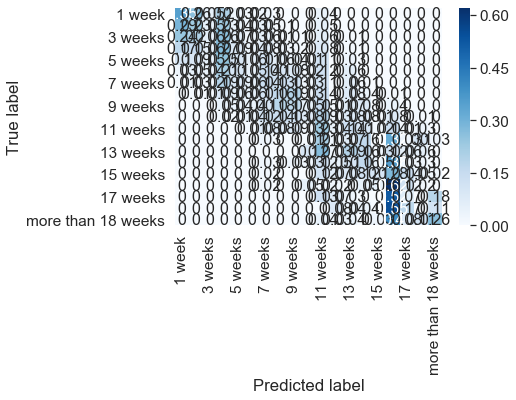

In [9]:
#create label names
label_names = []
label_names.append('1 week')
[label_names.append(str(c) + ' weeks') for c in range(2,cfg.label['num_classes'])]
if cfg.label['num_classes']==2:
    label_names.append('more than '+ str(cfg.label['num_classes']-1)+ ' week')
else:       
    label_names.append('more than '+ str(cfg.label['num_classes']-1)+ ' weeks')


confusion_matrix = np.around(np.divide(conf_matrix, cfg.validation['splits']),2)

#store confusion_matrix
with open(timestamp_path + '/confusion_matrix.pkl', 'wb') as handle:
        pickle.dump(confusion_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

#print and store image of confusion matrix
df_cm = pd.DataFrame(confusion_matrix, label_names, label_names)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues) # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.savefig(timestamp_path+'/confusion_matrix.pdf', bbox_inches='tight')
plt.show()

In [10]:
#create distplot and store as pdf
features = pd.read_pickle(cfg.features['analysis_path'])
_, features = labels.TTD_create(features, cfg.label['num_classes'])

fig = plt.figure(figsize= (30,30))
fig.suptitle('', fontsize=30)

for i, feature in enumerate(cfg.features['names']):
    for c in range(cfg.label['num_classes']):
        
        ax = plt.subplot(5,4,i+1)
        f = features[features['label']==c][feature]
        feature_noNan = f.dropna()
        sns.distplot(feature_noNan, hist=True, kde=True, label=c)
        
    plt.legend()
plt.savefig(timestamp_path+'/distplot.pdf', bbox_inches='tight')
plt.close()

D:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
